In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')

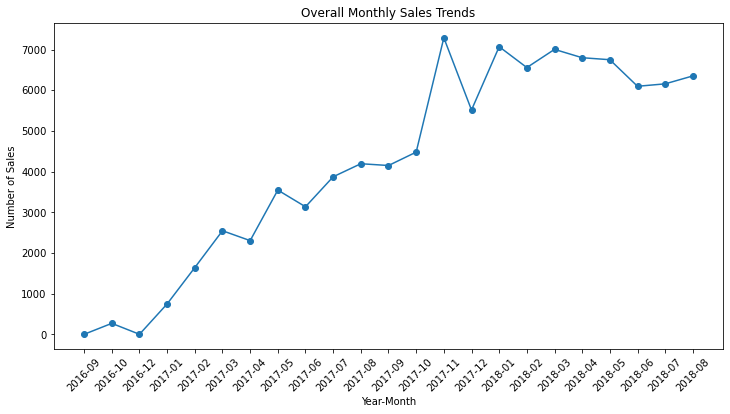

In [2]:
# Convert 'order_purchase_timestamp' to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract year and month from the order date
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Group by year and month and extract monthly sales data
monthly_sales = orders.groupby('year_month').size()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.title('Overall Monthly Sales Trends')

# Display the plot
plt.xticks(rotation=45)
plt.show()

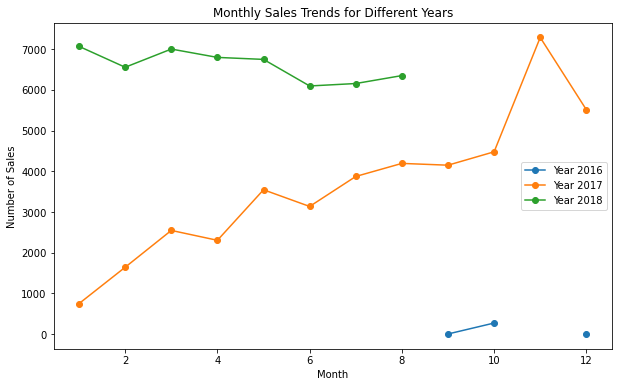

In [3]:
# Extract year from the order date
orders['order_year'] = orders['order_purchase_timestamp'].dt.year

# Extract month from the order date
orders['order_month'] = orders['order_purchase_timestamp'].dt.month

# Group by year and month and extract monthly sales data
monthly_sales_by_year = orders.groupby(['order_year', 'order_month']).size().unstack()

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plot each year separately
for year in monthly_sales_by_year.index:
    plt.plot(monthly_sales_by_year.columns, monthly_sales_by_year.loc[year], marker='o', linestyle='-', label=f'Year {year}')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales Trends for Different Years')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [4]:
order_product_info = order_items.merge(products, on='product_id')

In [5]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

order_product_info['broad_category'] = order_product_info['product_category_name'].apply(classify_cat)
category = order_product_info.broad_category.value_counts().index
count = order_product_info.broad_category.value_counts().values

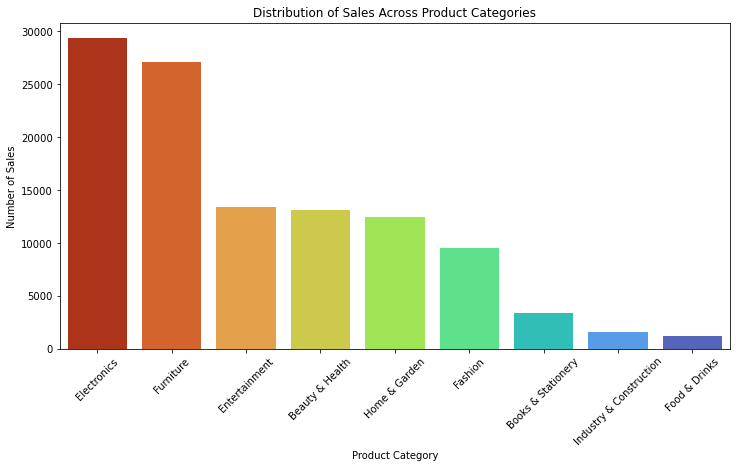

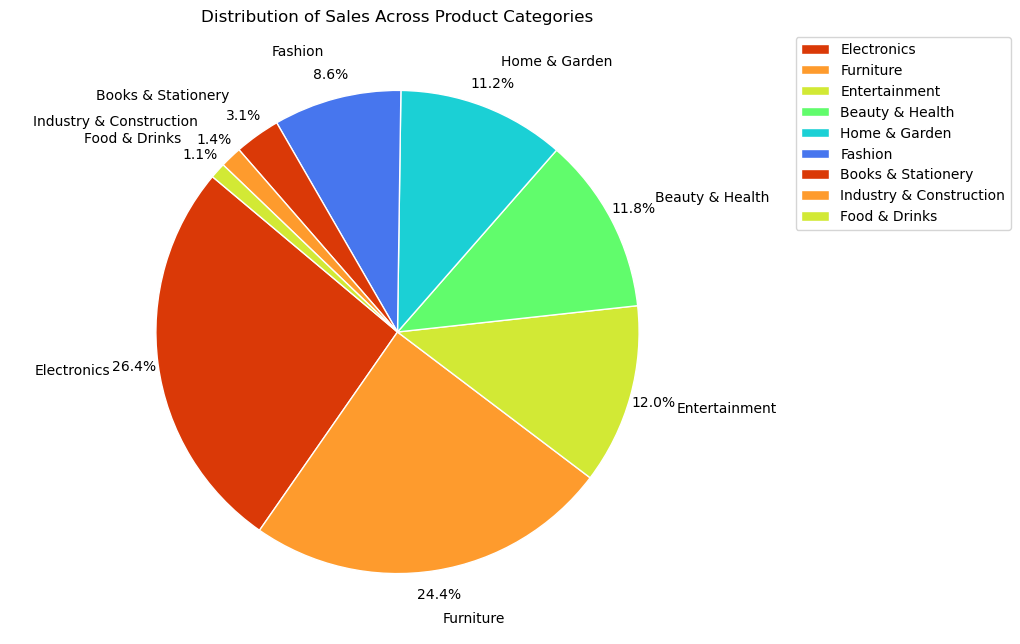

In [6]:
# Plotting Bar Chart
plt.figure(figsize=(12, 6))

# Use the value_counts DataFrame directly
sns.barplot(x=category, y=count, palette='turbo_r')

plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales Across Product Categories')
plt.xticks(rotation=45)
plt.show()

# Plotting Pie Chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')

# Using a colormap for colors
colors = plt.cm.turbo_r(range(len(order_product_info)))

ax.pie(count, labels=category, radius=1, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('turbo_r'), labeldistance=1.20, pctdistance=1.1, wedgeprops=dict(width=1, edgecolor='w'))
plt.title('Distribution of Sales Across Product Categories')
plt.legend(category, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [7]:
order_product_info

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,broad_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,9.0,14.0,Fashion
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,650.0,28.0,9.0,14.0,Fashion
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,650.0,28.0,9.0,14.0,Fashion
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,650.0,28.0,9.0,14.0,Fashion
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,650.0,28.0,9.0,14.0,Fashion
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,garden_tools,6700.0,35.0,12.0,22.0,Furniture
111042,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,furniture_decor,2300.0,37.0,30.0,20.0,Furniture
111043,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,watches_gifts,400.0,19.0,9.0,15.0,Electronics
111044,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure,2700.0,60.0,15.0,15.0,Entertainment


In [8]:
# Group by 'order_id' and get the maximum 'order_item_id'
max_order_item_id = order_product_info.groupby('order_id')['order_item_id'].max().reset_index()
max_order_item_id

,order_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
97271,fffc94f6ce00a00581880bf54a75a037,1
97272,fffcd46ef2263f404302a634eb57f7eb,1
97273,fffce4705a9662cd70adb13d4a31832d,1
97274,fffe18544ffabc95dfada21779c9644f,1


In [9]:
# Merge to get the complete information for the rows with max 'order_item_id'
order_product_info = pd.merge(max_order_item_id, order_product_info, on=['order_id', 'order_item_id'], how='inner')
order_product_info

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,broad_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,Fashion
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,Home & Garden
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,3050.0,33.0,13.0,33.0,Furniture
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,Beauty & Health
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,3750.0,35.0,40.0,30.0,Furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97271,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,10150.0,89.0,15.0,40.0,Home & Garden
97272,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,8950.0,45.0,26.0,38.0,Electronics
97273,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,967.0,21.0,24.0,19.0,Entertainment
97274,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,100.0,20.0,20.0,20.0,Electronics


In [10]:
# Merge with purchase timestamp DataFrametimestamps
order_product_info = order_product_info.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id')
order_product_info

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,broad_category,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,Fashion,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,Home & Garden,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,3050.0,33.0,13.0,33.0,Furniture,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,Beauty & Health,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,3750.0,35.0,40.0,30.0,Furniture,2017-02-04 13:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95124,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,10150.0,89.0,15.0,40.0,Home & Garden,2018-04-23 13:57:06
95125,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,8950.0,45.0,26.0,38.0,Electronics,2018-07-14 10:26:46
95126,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,967.0,21.0,24.0,19.0,Entertainment,2017-10-23 17:07:56
95127,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,100.0,20.0,20.0,20.0,Electronics,2017-08-14 23:02:59


In [11]:
# Convert 'order_purchase_timestamp' to datetime
order_product_info['order_purchase_timestamp'] = pd.to_datetime(order_product_info['order_purchase_timestamp'])

# Extract year-month from the order date
order_product_info['year_month'] = order_product_info['order_purchase_timestamp'].dt.to_period('M')
order_product_info

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,broad_category,order_purchase_timestamp,year_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,Fashion,2017-09-13 08:59:02,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,Home & Garden,2017-04-26 10:53:06,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,3050.0,33.0,13.0,33.0,Furniture,2018-01-14 14:33:31,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,200.0,16.0,10.0,15.0,Beauty & Health,2018-08-08 10:00:35,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,3750.0,35.0,40.0,30.0,Furniture,2017-02-04 13:57:51,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95124,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,10150.0,89.0,15.0,40.0,Home & Garden,2018-04-23 13:57:06,2018-04
95125,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,8950.0,45.0,26.0,38.0,Electronics,2018-07-14 10:26:46,2018-07
95126,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,967.0,21.0,24.0,19.0,Entertainment,2017-10-23 17:07:56,2017-10
95127,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,100.0,20.0,20.0,20.0,Electronics,2017-08-14 23:02:59,2017-08


In [12]:
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = order_product_info.pivot_table(index='broad_category', columns='year_month', values='order_item_id', aggfunc='sum')
heatmap_data

year_month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
broad_category,,,,,,,,,,,,,,,,,,,,,
Beauty & Health,3.0,73.0,NaN,116.0,204.0,314.0,280.0,427.0,402.0,431.0,...,879.0,694.0,849.0,866.0,860.0,862.0,950.0,1070.0,977.0,1057.0
Books & Stationery,NaN,NaN,NaN,16.0,28.0,82.0,50.0,87.0,62.0,94.0,...,208.0,297.0,456.0,201.0,224.0,228.0,244.0,235.0,250.0,235.0
Electronics,NaN,55.0,NaN,162.0,441.0,676.0,603.0,942.0,796.0,969.0,...,2067.0,1584.0,2270.0,2495.0,2327.0,2153.0,2106.0,1817.0,1875.0,1819.0
Entertainment,NaN,43.0,NaN,118.0,217.0,302.0,325.0,515.0,440.0,591.0,...,1114.0,940.0,837.0,817.0,996.0,847.0,775.0,670.0,671.0,707.0
Fashion,NaN,30.0,1.0,117.0,154.0,257.0,244.0,487.0,397.0,475.0,...,730.0,553.0,670.0,481.0,626.0,572.0,547.0,437.0,410.0,462.0
Food & Drinks,NaN,1.0,NaN,2.0,8.0,31.0,11.0,16.0,4.0,20.0,...,65.0,69.0,80.0,92.0,79.0,114.0,115.0,68.0,94.0,162.0
Furniture,NaN,84.0,NaN,305.0,564.0,854.0,658.0,883.0,788.0,1226.0,...,2493.0,1388.0,1905.0,1606.0,1898.0,1859.0,1842.0,1565.0,1459.0,1368.0
Home & Garden,NaN,27.0,NaN,59.0,163.0,319.0,328.0,549.0,529.0,546.0,...,718.0,471.0,685.0,705.0,735.0,938.0,993.0,958.0,998.0,1082.0
Industry & Construction,NaN,4.0,NaN,3.0,11.0,5.0,NaN,7.0,12.0,9.0,...,86.0,55.0,94.0,138.0,143.0,183.0,196.0,164.0,172.0,215.0


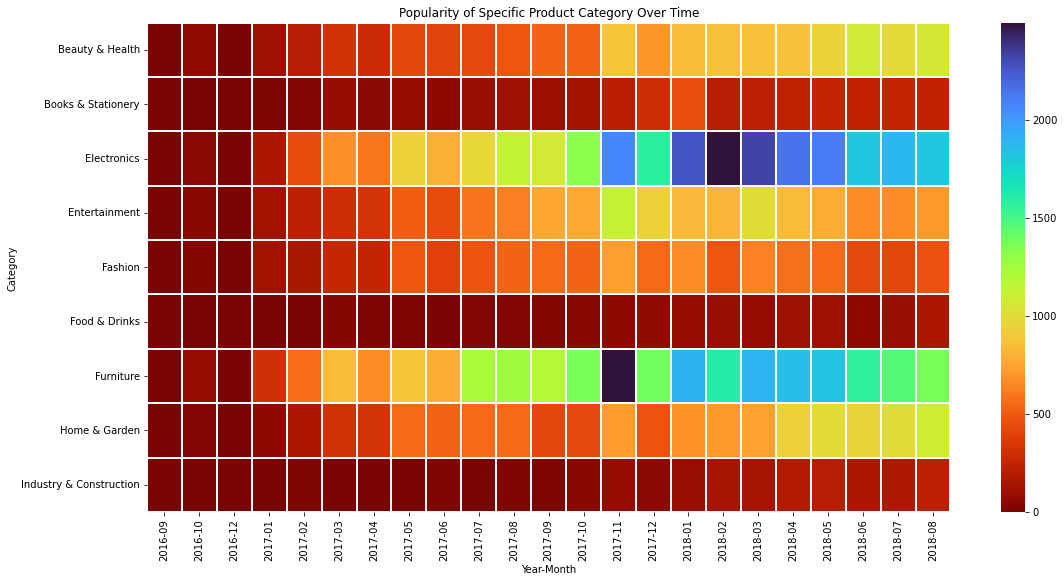

In [13]:
# Replace NaN values with a default value (e.g., 0)
heatmap_data = heatmap_data.fillna(0)

# Set the size of the heatmap
plt.figure(figsize=(18, 9))

# Create the heatmap
sns.heatmap(heatmap_data, cmap='turbo_r', linewidths=1.5)

# Set labels and title
plt.xlabel('Year-Month')
plt.ylabel('Category')
plt.title('Popularity of Specific Product Category Over Time')

# Show the plot
plt.show()

In [14]:
# Merge customer and order
customer_order = pd.merge(customers, orders, on='customer_id', how='inner')

# Convert 'order_purchase_timestamp' to datetime
customer_order['order_purchase_timestamp'] = pd.to_datetime(customer_order['order_purchase_timestamp'])
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,order_year,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,São Bernardo do Campo,São Paulo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,São Paulo,São Paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,São Paulo,São Paulo,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04,2018,4
96457,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,São Paulo,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04,2018,4
96458,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,Ceará,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04,2018,4
96459,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,Rio Grande do Sul,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11,2017,11


In [15]:
# Count the number of customers for each purchase month
customer_counts = customer_order.groupby(customer_order['order_purchase_timestamp'].dt.to_period("M")).size().reset_index(name='total_customers')
customer_counts

,order_purchase_timestamp,total_customers
0,2016-09,1
1,2016-10,270
2,2016-12,1
3,2017-01,748
4,2017-02,1641
5,2017-03,2546
6,2017-04,2303
7,2017-05,3545
8,2017-06,3135
9,2017-07,3872


In [16]:
# Create a DataFrame with unique customer IDs and their first purchase date
customer_first_purchase = customer_order.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
customer_first_purchase

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93337,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93338,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93339,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93340,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [17]:
count_first_purchase = customer_first_purchase.groupby(customer_first_purchase['order_purchase_timestamp'].dt.to_period("M")).size().reset_index(name='total_new_customers')
count_first_purchase

,order_purchase_timestamp,total_new_customers
0,2016-09,1
1,2016-10,267
2,2016-12,1
3,2017-01,715
4,2017-02,1616
5,2017-03,2503
6,2017-04,2256
7,2017-05,3450
8,2017-06,3037
9,2017-07,3752


In [18]:
customer_number = pd.merge(customer_counts, count_first_purchase, on='order_purchase_timestamp', how='inner')
customer_number

,order_purchase_timestamp,total_customers,total_new_customers
0,2016-09,1,1
1,2016-10,270,267
2,2016-12,1,1
3,2017-01,748,715
4,2017-02,1641,1616
5,2017-03,2546,2503
6,2017-04,2303,2256
7,2017-05,3545,3450
8,2017-06,3135,3037
9,2017-07,3872,3752


In [19]:
customer_order = pd.merge(customer_order, customer_first_purchase, on='customer_unique_id', how='inner')
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp_x,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,order_year,order_month,order_purchase_timestamp_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017,5,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,São Bernardo do Campo,São Paulo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018,1,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,São Paulo,São Paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018,5,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018,3,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018,7,2018-07-29 09:51:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,São Paulo,São Paulo,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04,2018,4,2018-04-07 15:48:17
96457,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,São Paulo,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04,2018,4,2018-04-04 08:20:22
96458,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,Ceará,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04,2018,4,2018-04-08 20:11:50
96459,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,Rio Grande do Sul,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11,2017,11,2017-11-03 21:08:33


In [20]:
def check_retained(x, y):
    return y < x

customer_order['retained'] = check_retained(customer_order['order_purchase_timestamp_x'], customer_order['order_purchase_timestamp_y'])
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp_x,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,order_year,order_month,order_purchase_timestamp_y,retained
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017,5,2017-05-16 15:05:35,False
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,São Bernardo do Campo,São Paulo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018,1,2018-01-12 20:48:24,False
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,São Paulo,São Paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018,5,2018-05-19 16:07:45,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018,3,2018-03-13 16:06:38,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018,7,2018-07-29 09:51:30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,São Paulo,São Paulo,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018-04,2018,4,2018-04-07 15:48:17,False
96457,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,São Paulo,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018-04,2018,4,2018-04-04 08:20:22,False
96458,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,Ceará,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018-04,2018,4,2018-04-08 20:11:50,False
96459,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,Rio Grande do Sul,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017-11,2017,11,2017-11-03 21:08:33,False


In [21]:
# Count the number of retained customers for each purchase month
retained_customer_counts = customer_order[customer_order['retained']].groupby(customer_order['order_purchase_timestamp_x'].dt.to_period("M")).size().reset_index(name='number_retained')

# Rename the column
retained_customer_counts = retained_customer_counts.rename(columns={'order_purchase_timestamp_x': 'order_purchase_timestamp'})
retained_customer_counts

,order_purchase_timestamp,number_retained
0,2016-10,3
1,2017-01,28
2,2017-02,23
3,2017-03,37
4,2017-04,41
5,2017-05,81
6,2017-06,89
7,2017-07,104
8,2017-08,115
9,2017-09,132


In [22]:
customer_number = pd.merge(customer_number, retained_customer_counts, on='order_purchase_timestamp', how='inner')
customer_number

,order_purchase_timestamp,total_customers,total_new_customers,number_retained
0,2016-10,270,267,3
1,2017-01,748,715,28
2,2017-02,1641,1616,23
3,2017-03,2546,2503,37
4,2017-04,2303,2256,41
5,2017-05,3545,3450,81
6,2017-06,3135,3037,89
7,2017-07,3872,3752,104
8,2017-08,4193,4057,115
9,2017-09,4149,4003,132


In [23]:
# New data to be added
new_data = {
    'order_purchase_timestamp': ['2016-09'],
    'total_customers': [1],
    'total_new_customers': [1],
    'number_retained': [0]
}

# Convert the new data to a DataFrame
new_row = pd.DataFrame(new_data)

# Specify the position where you want to insert the new row
position = 0

# Insert the new row at the specified position
customer_number = pd.concat([customer_number.iloc[:position], new_row, customer_number.iloc[position:]]).reset_index(drop=True)
customer_number

,order_purchase_timestamp,total_customers,total_new_customers,number_retained
0,2016-09,1,1,0
1,2016-10,270,267,3
2,2017-01,748,715,28
3,2017-02,1641,1616,23
4,2017-03,2546,2503,37
5,2017-04,2303,2256,41
6,2017-05,3545,3450,81
7,2017-06,3135,3037,89
8,2017-07,3872,3752,104
9,2017-08,4193,4057,115


In [24]:
# New data to be added
new_data = {
    'order_purchase_timestamp': ['2016-11'],
    'total_customers': [0],
    'total_new_customers': [0],
    'number_retained': [0]
}

# Convert the new data to a DataFrame
new_row = pd.DataFrame(new_data)

# Specify the position where you want to insert the new row
position = 2

# Insert the new row at the specified position
customer_number = pd.concat([customer_number.iloc[:position], new_row, customer_number.iloc[position:]]).reset_index(drop=True)
customer_number

,order_purchase_timestamp,total_customers,total_new_customers,number_retained
0,2016-09,1,1,0
1,2016-10,270,267,3
2,2016-11,0,0,0
3,2017-01,748,715,28
4,2017-02,1641,1616,23
5,2017-03,2546,2503,37
6,2017-04,2303,2256,41
7,2017-05,3545,3450,81
8,2017-06,3135,3037,89
9,2017-07,3872,3752,104


In [25]:
# New data to be added
new_data = {
    'order_purchase_timestamp': ['2016-12'],
    'total_customers': [1],
    'total_new_customers': [1],
    'number_retained': [0]
}

# Convert the new data to a DataFrame
new_row = pd.DataFrame(new_data)

# Specify the position where you want to insert the new row
position = 3

# Insert the new row at the specified position
customer_number = pd.concat([customer_number.iloc[:position], new_row, customer_number.iloc[position:]]).reset_index(drop=True)
customer_number

,order_purchase_timestamp,total_customers,total_new_customers,number_retained
0,2016-09,1,1,0
1,2016-10,270,267,3
2,2016-11,0,0,0
3,2016-12,1,1,0
4,2017-01,748,715,28
5,2017-02,1641,1616,23
6,2017-03,2546,2503,37
7,2017-04,2303,2256,41
8,2017-05,3545,3450,81
9,2017-06,3135,3037,89


In [26]:
# Create a new DataFrame for cohort values
cohort_data = {'order_purchase_timestamp': [], 'cohort_index': []}

# Iterate through each row in the customer_number DataFrame
for index, row in customer_number.iterrows():
    order_purchase_timestamp = row['order_purchase_timestamp']
    total_customers = row['total_customers']

    # Calculate the cyclical cohort_index within each order_purchase_timestamp
    cohort_index_values = list(range(1, 25 - index))
    cohort_data['order_purchase_timestamp'].extend([order_purchase_timestamp] * len(cohort_index_values))
    cohort_data['cohort_index'].extend(cohort_index_values)  # Set cohort_index values within each order_purchase_timestamp    

# Create the cohort DataFrame
cohort_df = pd.DataFrame(cohort_data)

# Convert the 'order_purchase_timestamp' column to Period dtype
cohort_df['order_purchase_timestamp'] = cohort_df['order_purchase_timestamp'].astype('period[M]')

# Sort the DataFrame by 'order_purchase_timestamp' and 'cohort_index'
cohort_df = cohort_df.sort_values(by=['order_purchase_timestamp', 'cohort_index'])

print(cohort_df['order_purchase_timestamp'].unique())
print(cohort_df['cohort_index'].unique())
print(cohort_df.tail())
cohort_df

<PeriodArray>
['2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
 '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
 '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
 '2018-06', '2018-07', '2018-08']
Length: 24, dtype: period[M]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
    order_purchase_timestamp  cohort_index
295                  2018-06             2
296                  2018-06             3
297                  2018-07             1
298                  2018-07             2
299                  2018-08             1


,order_purchase_timestamp,cohort_index
0,2016-09,1
1,2016-09,2
2,2016-09,3
3,2016-09,4
4,2016-09,5
...,...,...
295,2018-06,2
296,2018-06,3
297,2018-07,1
298,2018-07,2


In [27]:
# Create empty arrays
total_customers_cumsum_array = []
number_retained_cumsum_array = []

customer_numbers = pd.DataFrame({
    'order_purchase_timestamp': ['2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
                                 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                                 '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'],
    'total_customers': [1, 270, 0, 1, 748, 1641, 2546, 2303, 3545, 3135, 3872, 4193, 4149, 4478, 7288, 5513, 7069, 6556, 7003, 6798, 6749, 6096, 6156, 6351],
    'total_new_customers': [1, 267, 0, 1, 715, 1616, 2503, 2256, 3450, 3037, 3752, 4057, 4003, 4329, 7059, 5338, 6842, 6289, 6774, 6582, 6506, 5875, 5946, 6144],
    'number_retained': [0, 3, 0, 0, 28, 23, 37, 41, 81, 89, 104, 115, 132, 138, 207, 163, 208, 241, 209, 209, 239, 209, 186, 202]
})

i = 1
while i <= 24:
    # Sort DataFrame by 'order_purchase_timestamp'
    customer_numbers = customer_numbers.sort_values(by='order_purchase_timestamp')

    # Calculate cumulative sum for each column
    customer_numbers['total_customers_cumsum'] = customer_numbers['total_customers'].cumsum()
    customer_numbers['total_new_customers_cumsum'] = customer_numbers['total_new_customers'].cumsum()
    customer_numbers['number_retained_cumsum'] = customer_numbers['number_retained'].cumsum()

    # Append values to arrays
    for index, row in customer_numbers.iterrows():
        total_customers_cumsum_array.append(row['total_customers_cumsum'])
        number_retained_cumsum_array.append(row['number_retained_cumsum'])
        
    # Remove the first row
    customer_numbers = customer_numbers.iloc[1:]
    i = i + 1

print(total_customers_cumsum_array)
print(number_retained_cumsum_array)

[1, 271, 271, 272, 1020, 2661, 5207, 7510, 11055, 14190, 18062, 22255, 26404, 30882, 38170, 43683, 50752, 57308, 64311, 71109, 77858, 83954, 90110, 96461, 270, 270, 271, 1019, 2660, 5206, 7509, 11054, 14189, 18061, 22254, 26403, 30881, 38169, 43682, 50751, 57307, 64310, 71108, 77857, 83953, 90109, 96460, 0, 1, 749, 2390, 4936, 7239, 10784, 13919, 17791, 21984, 26133, 30611, 37899, 43412, 50481, 57037, 64040, 70838, 77587, 83683, 89839, 96190, 1, 749, 2390, 4936, 7239, 10784, 13919, 17791, 21984, 26133, 30611, 37899, 43412, 50481, 57037, 64040, 70838, 77587, 83683, 89839, 96190, 748, 2389, 4935, 7238, 10783, 13918, 17790, 21983, 26132, 30610, 37898, 43411, 50480, 57036, 64039, 70837, 77586, 83682, 89838, 96189, 1641, 4187, 6490, 10035, 13170, 17042, 21235, 25384, 29862, 37150, 42663, 49732, 56288, 63291, 70089, 76838, 82934, 89090, 95441, 2546, 4849, 8394, 11529, 15401, 19594, 23743, 28221, 35509, 41022, 48091, 54647, 61650, 68448, 75197, 81293, 87449, 93800, 2303, 5848, 8983, 12855, 17

In [28]:
cohort_df['total_customers_cumsum'] = total_customers_cumsum_array
cohort_df['number_retained_cumsum'] = number_retained_cumsum_array
cohort_df

,order_purchase_timestamp,cohort_index,total_customers_cumsum,number_retained_cumsum
0,2016-09,1,1,0
1,2016-09,2,271,3
2,2016-09,3,271,3
3,2016-09,4,272,3
4,2016-09,5,1020,31
...,...,...,...,...
295,2018-06,2,12252,395
296,2018-06,3,18603,597
297,2018-07,1,6156,186
298,2018-07,2,12507,388


In [29]:
# Calculate retention rate
cohort_df['retention_rate'] = (cohort_df['number_retained_cumsum'] / cohort_df['total_customers_cumsum']) * 100
cohort_df['retention_rate'] = cohort_df['retention_rate'].round(2)
cohort_df

,order_purchase_timestamp,cohort_index,total_customers_cumsum,number_retained_cumsum,retention_rate
0,2016-09,1,1,0,0.00
1,2016-09,2,271,3,1.11
2,2016-09,3,271,3,1.11
3,2016-09,4,272,3,1.10
4,2016-09,5,1020,31,3.04
...,...,...,...,...,...
295,2018-06,2,12252,395,3.22
296,2018-06,3,18603,597,3.21
297,2018-07,1,6156,186,3.02
298,2018-07,2,12507,388,3.10


In [30]:
cohort_counts = cohort_df.pivot(index='order_purchase_timestamp',
                                 columns ='cohort_index',
                                 values = 'retention_rate')
cohort_counts.iat[2, 0] = float(0.0)
cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09,0.00,1.11,1.11,1.10,3.04,2.03,1.75,1.76,1.93,2.13,...,2.61,2.66,2.70,2.81,2.83,2.85,2.91,2.95,2.95,2.97
2016-10,1.11,1.11,1.11,3.04,2.03,1.75,1.76,1.93,2.13,2.25,...,2.66,2.70,2.81,2.83,2.85,2.91,2.95,2.95,2.97,NaN
2016-11,0.00,0.00,3.74,2.13,1.78,1.78,1.95,2.15,2.27,2.36,...,2.71,2.82,2.84,2.86,2.92,2.96,2.96,2.97,NaN,NaN
2016-12,0.00,3.74,2.13,1.78,1.78,1.95,2.15,2.27,2.36,2.49,...,2.82,2.84,2.86,2.92,2.96,2.96,2.97,NaN,NaN,NaN
2017-01,3.74,2.13,1.78,1.78,1.95,2.15,2.27,2.36,2.49,2.57,...,2.84,2.86,2.92,2.96,2.96,2.97,NaN,NaN,NaN,NaN
2017-02,1.40,1.43,1.56,1.81,2.06,2.20,2.31,2.45,2.55,2.60,...,2.85,2.91,2.95,2.95,2.97,NaN,NaN,NaN,NaN,NaN
2017-03,1.45,1.61,1.89,2.15,2.29,2.38,2.52,2.61,2.66,2.70,...,2.94,2.98,2.98,3.00,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,1.78,2.09,2.35,2.45,2.52,2.65,2.73,2.75,2.78,2.81,...,3.03,3.03,3.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,2.28,2.54,2.60,2.64,2.76,2.82,2.82,2.84,2.86,2.97,...,3.06,3.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


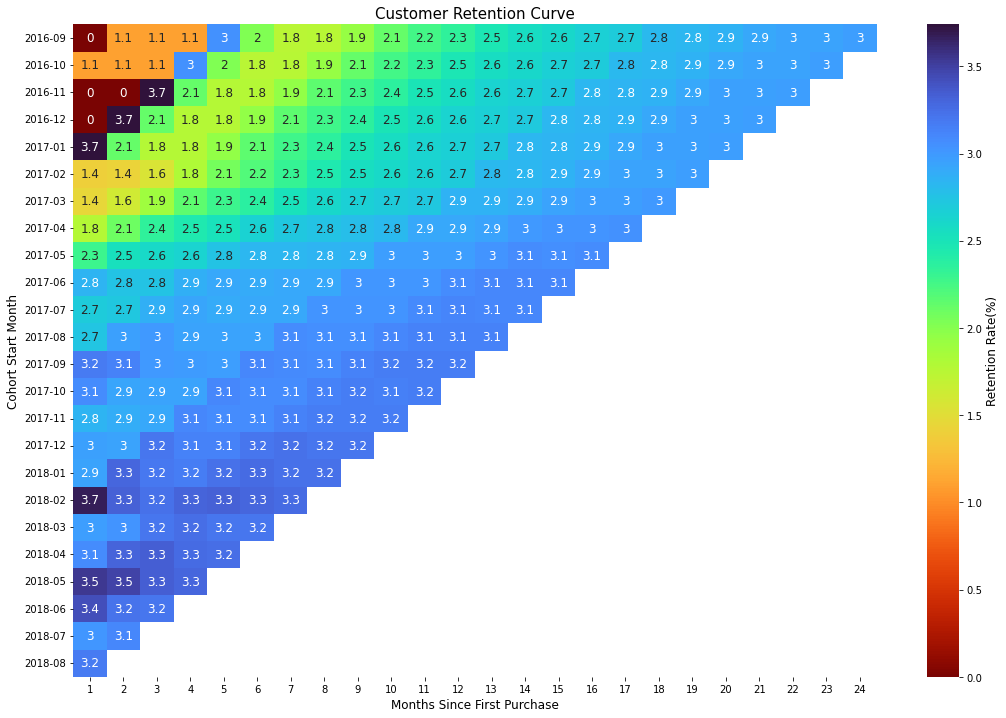

In [31]:
# Plot the retention curve
plt.figure(figsize=(18, 12))
plt.title('Customer Retention Curve', fontsize=15)
heatmap = sns.heatmap(cohort_counts, annot=True, cmap='turbo_r', cbar_kws={'label': 'Retention Rate(%)'}, annot_kws={'size': 12})
# Adjust the font size of the color bar label
heatmap.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel('Months Since First Purchase', fontsize=12)
plt.ylabel('Cohort Start Month', fontsize=12)
plt.show()

In [ ]:
# Create a new DataFrame for cohort values
cohort_data = {'order_purchase_timestamp': [], 'cohort_index': []}

# Iterate through each row in the customer_number DataFrame
for index, row in customer_number.iterrows():
    order_purchase_timestamp = row['order_purchase_timestamp']
    total_customers = row['total_customers']

    # Repeat the order_purchase_timestamp for total_customers times and add cohort indices
    cohort_data['order_purchase_timestamp'].extend([order_purchase_timestamp] * 24)
    cohort_data['cohort_index'].extend(range(1, 25))

# Create the cohort DataFrame
cohort_df = pd.DataFrame(cohort_data)
cohort_df

In [ ]:
# Create a new DataFrame for cohort values
cohort_data = {'order_purchase_timestamp': [], 'cohort_index': [], 'total_customers': [], 'number_retained': []}

# Iterate through each row in the customer_number DataFrame
for index, row in customer_number.iterrows():
    order_purchase_timestamp = row['order_purchase_timestamp']
    total_customers = row['total_customers']
    number_retained = row['number_retained']

    # Repeat the order_purchase_timestamp for total_customers times and add cohort indices
    cohort_data['order_purchase_timestamp'].extend([order_purchase_timestamp] * 24)
    cohort_data['cohort_index'].extend(range(1, 25))
    
    # Calculate cumulative sum for total_customers and number_retained
    cohort_data['total_customers'].extend(np.cumsum([0] + [total_customers] * 23))
    cohort_data['number_retained'].extend(np.cumsum([0] + [number_retained] * 23))

# Create the cohort DataFrame
cohort_df = pd.DataFrame(cohort_data)
cohort_df

In [ ]:
# Create a new DataFrame for cohort values
cohort_data = {'order_purchase_timestamp': [], 'cohort_index': []}

# Iterate through each row in the customer_number DataFrame
for index, row in customer_number.iterrows():
    order_purchase_timestamp = row['order_purchase_timestamp']
    total_customers = row['total_customers']

    # Calculate the cyclical cohort_index within each order_purchase_timestamp
    cohort_data['order_purchase_timestamp'].extend([order_purchase_timestamp] * (24 - index))
    cohort_data['cohort_index'].extend(range(1, index + 2))  # Increasing cohort_index within each order_purchase_timestamp    

# Create the cohort DataFrame
cohort_df = pd.DataFrame(cohort_data)

cohort_df = cohort_df.sort_values(by=['order_purchase_timestamp', 'cohort_index'])


print(cohort_df['order_purchase_timestamp'].unique())
print(cohort_df['cohort_index'].unique())
print(cohort_df.tail())
cohort_df

In [ ]:
# Create a new DataFrame for cohort values
cohort_data = {'order_purchase_timestamp': [], 'cohort_index': []}

# Iterate through each row in the customer_number DataFrame
for index, row in customer_number.iterrows():
    order_purchase_timestamp = row['order_purchase_timestamp']
    total_customers = row['total_customers']

    # Calculate the cyclical cohort_index within each order_purchase_timestamp
    cohort_data['order_purchase_timestamp'].extend([order_purchase_timestamp] * (24 - index))
    cohort_data['cohort_index'].extend(range(1, index + 2))  # Increasing cohort_index within each order_purchase_timestamp    

# Create the cohort DataFrame
cohort_df = pd.DataFrame(cohort_data)

# Convert the 'order_purchase_timestamp' column to Period dtype
cohort_df['order_purchase_timestamp'] = cohort_df['order_purchase_timestamp'].astype('period[M]')

# Sort the DataFrame by 'order_purchase_timestamp' and 'cohort_index'
cohort_df = cohort_df.sort_values(by=['order_purchase_timestamp', 'cohort_index'])

print(cohort_df['order_purchase_timestamp'].unique())
print(cohort_df['cohort_index'].unique())
print(cohort_df.tail())
cohort_df

In [ ]:
# Your customer_number DataFrame
customer_numbers = pd.DataFrame({
    'order_purchase_timestamp': ['2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
                                 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                                 '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'],
    'total_customers': [1, 270, 0, 1, 748, 1641, 2546, 2303, 3545, 3135, 3872, 4193, 4149, 4478, 7288, 5513, 7069, 6556, 7003, 6798, 6749, 6096, 6156, 6351],
    'total_new_customers': [1, 267, 0, 1, 715, 1616, 2503, 2256, 3450, 3037, 3752, 4057, 4003, 4329, 7059, 5338, 6842, 6289, 6774, 6582, 6506, 5875, 5946, 6144],
    'number_retained': [0, 3, 0, 0, 28, 23, 37, 41, 81, 89, 104, 115, 132, 138, 207, 163, 208, 241, 209, 209, 239, 209, 186, 202]
})

# Convert 'order_purchase_timestamp' to datetime
customer_numbers['order_purchase_timestamp'] = pd.to_datetime(customer_numbers['order_purchase_timestamp'])

# Sort DataFrame by 'order_purchase_timestamp'
customer_numbers = customer_numbers.sort_values(by='order_purchase_timestamp')

# Calculate cumulative sum for each column
customer_numbers['total_customers_cumsum'] = customer_numbers['total_customers'].cumsum()
customer_numbers['total_new_customers_cumsum'] = customer_numbers['total_new_customers'].cumsum()
customer_numbers['number_retained_cumsum'] = customer_numbers['number_retained'].cumsum()

# Create empty arrays
total_customers_cumsum_array = []
number_retained_cumsum_array = []

# Append values to arrays
for index, row in customer_numbers.iterrows():
    total_customers_cumsum_array.append(row['total_customers_cumsum'])
    number_retained_cumsum_array.append(row['number_retained_cumsum'])

# Print or use the arrays as needed
print("Total Customers Cumulative Sum Array:", total_customers_cumsum_array)
print("Number Retained Cumulative Sum Array:", number_retained_cumsum_array)

# Remove the first row
customer_numbers = customer_numbers.iloc[1:]

# Calculate cumulative sum for each column
customer_numbers['total_customers_cumsum'] = customer_numbers['total_customers'].cumsum()
customer_numbers['total_new_customers_cumsum'] = customer_numbers['total_new_customers'].cumsum()
customer_numbers['number_retained_cumsum'] = customer_numbers['number_retained'].cumsum()

# Append values to arrays
for index, row in customer_numbers.iterrows():
    total_customers_cumsum_array.append(row['total_customers_cumsum'])
    number_retained_cumsum_array.append(row['number_retained_cumsum'])
    
# Print or use the arrays as needed
print("\n\nTotal Customers Cumulative Sum Array:", total_customers_cumsum_array)
print("Number Retained Cumulative Sum Array:", number_retained_cumsum_array)

In [ ]:
cohort_counts = cohort_df.pivot(index='order_purchase_timestamp',
                                 columns ='cohort_index',
                                 values = 'number_retained_cumsum')
cohort_counts

In [ ]:
# Your customer_number DataFrame
customer_numbers = pd.DataFrame({
    'order_purchase_timestamp': ['2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
                                 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                                 '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'],
    'total_customers': [1, 270, 0, 1, 748, 1641, 2546, 2303, 3545, 3135, 3872, 4193, 4149, 4478, 7288, 5513, 7069, 6556, 7003, 6798, 6749, 6096, 6156, 6351],
    'total_new_customers': [1, 267, 0, 1, 715, 1616, 2503, 2256, 3450, 3037, 3752, 4057, 4003, 4329, 7059, 5338, 6842, 6289, 6774, 6582, 6506, 5875, 5946, 6144],
    'number_retained': [0, 3, 0, 0, 28, 23, 37, 41, 81, 89, 104, 115, 132, 138, 207, 163, 208, 241, 209, 209, 239, 209, 186, 202]
})

# Convert 'order_purchase_timestamp' to datetime
customer_numbers['order_purchase_timestamp'] = pd.to_datetime(customer_numbers['order_purchase_timestamp'])

# Sort DataFrame by 'order_purchase_timestamp'
customer_numbers = customer_numbers.sort_values(by='order_purchase_timestamp')

# Calculate cumulative sum for each column from the second row to the end
customer_numbers['total_customers_cumsum'] = customer_numbers['total_customers'].cumsum().shift(fill_value=0)
customer_numbers['total_new_customers_cumsum'] = customer_numbers['total_new_customers'].cumsum().shift(fill_value=0)
customer_numbers['number_retained_cumsum'] = customer_numbers['number_retained'].cumsum().shift(fill_value=0)
customer_numbers

In [ ]:
# Create a new DataFrame for cohort values
cohort_data = {'order_purchase_timestamp': [], 'cohort_index': []}

# Iterate through each row in the customer_number DataFrame
for index, row in customer_number.iterrows():
    order_purchase_timestamp = row['order_purchase_timestamp']
    total_customers = row['total_customers']

    # Repeat the order_purchase_timestamp for total_customers times and add cohort indices
    cohort_data['order_purchase_timestamp'].extend([order_purchase_timestamp] * 24)
    cohort_data['cohort_index'].extend(range(1, 25))  # Update to include cohort_index 24

# Create the cohort DataFrame
cohort_df = pd.DataFrame(cohort_data)
print(cohort_df['order_purchase_timestamp'].unique())
print(cohort_df['cohort_index'].unique())
print(cohort_df.tail())
cohort_df

In [ ]:
# Create a new DataFrame for cohort values
cohort_data = {'order_purchase_timestamp': [], 'cohort_index': [], 'total_customers': [], 'number_retained': []}

# Iterate through each row in the customer_number DataFrame
for index, row in customer_number.iterrows():
    order_purchase_timestamp = row['order_purchase_timestamp']
    total_customers = row['total_customers']
    number_retained = row['number_retained']

    # Calculate the number of months in the cohort based on the position of the row
    cohort_months = len(customer_number) - index

    # Repeat the order_purchase_timestamp for cohort_months times and add cohort indices
    cohort_data['order_purchase_timestamp'].extend([order_purchase_timestamp] * cohort_months)
    cohort_data['cohort_index'].extend(range(1, cohort_months + 1))

    # Calculate cumulative sum for each cohort_index
    total_customers_cumsum = np.cumsum([total_customers] * cohort_months)
    number_retained_cumsum = np.cumsum([number_retained] * cohort_months)

    cohort_data['total_customers'].extend(total_customers_cumsum)
    cohort_data['number_retained'].extend(number_retained_cumsum)

# Create the cohort_df DataFrame
cohort_df = pd.DataFrame(cohort_data)
cohort_df

In [ ]:
# find cohort index
customer_order['cohort_index'] = (customer_order['order_purchase_timestamp_x'] - customer_order['order_purchase_timestamp_y']).dt.days // 30
print(customer_order['cohort_index'].unique())

# find cohort_month
customer_order['cohort_month'] = customer_order['order_purchase_timestamp_y'].dt.to_period("M")
print(customer_order['cohort_month'].unique())
customer_order

In [ ]:
# Group by the cohort month and cohort index and count the number of customers
cohort_counts = customer_order.groupby(['cohort_month', 'cohort_index']).size().reset_index(name='cohort_size')
print(cohort_counts.info())
print(cohort_counts['cohort_size'].unique())
cohort_counts

In [ ]:
# Fill null values with 0
cohort_counts = cohort_counts.fillna(0).astype({'cohort_size': int})
print(cohort_counts['cohort_size'].unique())
cohort_counts

In [ ]:
# Create a pivot table to get the cohort retention matrix
cohort_matrix = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='cohort_size')
cohort_matrix

In [ ]:

"""# Convert 'order_purchase_timestamp' to datetime
retained_customer_counts['order_purchase_timestamp'] = pd.to_datetime(retained_customer_counts['order_purchase_timestamp'])

# Generate a DataFrame with all months
all_months = pd.DataFrame({'order_purchase_timestamp': pd.to_datetime(pd.date_range('2016-09', '2018-08', freq='M'))})

"""# Merge the two DataFrames
retained_customer_counts = pd.merge(all_months, retained_customer_counts, on='order_purchase_timestamp', how='left')

# Replace NaN with 0 in the 'number_retained' column
retained_customer_counts['number_retained'] = retained_customer_counts['number_retained'].fillna(0).astype(int)

# Print the final result
print(retained_customer_counts)

In [ ]:
# Calculate retention rate
customer_number['retention_rate'] = (customer_number['number_retained'] / customer_number['total_customers']) * 100
print(customer_number)

In [ ]:
# Assign a cohort index based on the first order month for each customer
"""print(customer_number['order_purchase_timestamp'])
print(customer_number['order_purchase_timestamp'].min())"""
print(customer_number.index)
customer_number['cohort_index'] = customer_number.index
print(customer_number)

# Create a pivot table for cohort analysis
cohort_pivot = customer_number.pivot_table(
    index='order_purchase_timestamp',
    columns='cohort_index',
    values='retention_rate'
)
print(cohort_pivot)

# Plot the cohort analysis using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.1%', cmap='YlGnBu', linewidths=0.5)
plt.title('Cohort Analysis - Monthly Retention Rates')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

In [ ]:
customer_order['cohort_index'] = (customer_order['order_purchase_timestamp_x'] - customer_order['order_purchase_timestamp_y']).dt.days // 30
print(customer_order)

customer_order['cohort_month'] = customer_order['order_purchase_timestamp_y'].dt.to_period("M")
print(customer_order)

# Group by the cohort month and cohort index and count the number of customers
cohort_counts = customer_order.groupby(['cohort_month', 'cohort_index']).size().reset_index(name='cohort_size')
print(cohort_counts)

# Create a pivot table to get the cohort retention matrix
cohort_matrix = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='cohort_size')

# Calculate the retention rate for each cohort and cohort index
retention_matrix = cohort_matrix.divide(cohort_matrix.iloc[:, 0], axis=0) * 100

# Display the cohort retention matrix
print(retention_matrix)

# Pivot the data for plotting
#retention_matrix = cohort_counts.pivot(index='order_purchase_timestamp_y', columns='cohort_index', values='retention_rate')

# Plot the retention curve
plt.figure(figsize=(12, 8))
plt.title('Customer Retention Curve')
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', cbar_kws={'label': 'Retention Rate'})
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Start Month')
plt.show()

In [ ]:
# Create a DataFrame with unique customer IDs and their first purchase date
customer_first_purchase = customer_order.groupby('customer_unique_id')['order_purchase_timestamp_x'].min().reset_index()
customer_first_purchase['cohort_month'] = customer_first_purchase['order_purchase_timestamp_x'].dt.to_period("M")

# Merge the customer_order DataFrame with the cohort information
merged_df = pd.merge(customer_order, customer_first_purchase[['customer_unique_id', 'cohort_month']], on='customer_unique_id', how='inner')

# Calculate the cohort index, which is the number of months since the first purchase
merged_df['cohort_index'] = (merged_df['order_purchase_timestamp_x'] - merged_df['order_purchase_timestamp_y']).dt.days // 30

# Group by the cohort month and cohort index and count the number of customers
cohort_counts = merged_df.groupby(['cohort_month', 'cohort_index']).size().reset_index(name='cohort_size')

# Create a pivot table to get the cohort retention matrix
cohort_matrix = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='cohort_size')

# Calculate the retention rate for each cohort and cohort index
retention_matrix = cohort_matrix.divide(cohort_matrix.iloc[:, 0], axis=0) * 100

# Display the cohort retention matrix
print(retention_matrix)


In [ ]:
# Plot the customer retention curve
plt.figure(figsize=(10, 6))
plt.plot(str(customer_number['order_purchase_timestamp']), customer_number['retention_rate'], marker='o')
plt.title('Customer Retention Curve')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.show()

In [ ]:
customer_purchase = pd.merge(customer_order, customer_first_purchase, on='customer_unique_id', how='inner')
print(customer_purchase)

In [ ]:
# Calculate the cohort index, which is the number of months since the first purchase
customer_number['cohort_index'] = (customer_purchase['order_purchase_timestamp_x'] - customer_purchase['order_purchase_timestamp_y']).dt.days // 30
print(customer_purchase)
print(customer_number)

In [ ]:
# Count the number of customers for each cohort and cohort index
cohort_counts = customer_purchase.groupby(['order_purchase_timestamp_y', 'cohort_index']).size().reset_index(name='cohort_size')
print(cohort_counts)

In [ ]:
# Calculate the retention rate
cohort_counts['retention_rate'] = cohort_counts['cohort_size'] / cohort_counts.groupby('order_purchase_timestamp_y')['cohort_size'].transform('first')
print(cohort_counts)

In [ ]:
# Pivot the data for plotting
retention_matrix = cohort_counts.pivot(index='order_purchase_timestamp_y', columns='cohort_index', values='retention_rate')
print(retention_matrix)

"""# Plot the retention curve
plt.figure(figsize=(12, 8))
plt.title('Customer Retention Curve')
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', cbar_kws={'label': 'Retention Rate'})
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Start Month')
plt.show()"""

In [ ]:
# Pivot the data for plotting
retention_matrix = cohort_counts.pivot(index='order_purchase_timestamp_y', columns='cohort_index', values='retention_rate')

# Plot the retention curve
plt.figure(figsize=(12, 8))
plt.title('Customer Retention Curve')
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', cbar_kws={'label': 'Retention Rate'})
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Start Month')
plt.show()

In [ ]:
# Assuming you have a DataFrame with columns 'customer_id' and 'purchase_date'
# Make sure 'purchase_date' is in datetime format
# For example, you might load your data like this:
# df = pd.read_csv('your_data.csv')
# df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Create a DataFrame with unique customer IDs and their first purchase date
customer_first_purchase = df.groupby('customer_id')['purchase_date'].min().reset_index()

# Count the number of customers for each purchase month
customer_counts = df.groupby(df['purchase_date'].dt.to_period("M")).size().reset_index(name='total_customers')

# Merge the two DataFrames on customer_id
merged_df = pd.merge(df, customer_first_purchase, on='customer_id', how='inner')

# Calculate the cohort index, which is the number of months since the first purchase
merged_df['cohort_index'] = (merged_df['purchase_date_x'] - merged_df['purchase_date_y']).dt.days // 30

# Count the number of customers for each cohort and cohort index
cohort_counts = merged_df.groupby(['purchase_date_y', 'cohort_index']).size().reset_index(name='cohort_size')

# Calculate the retention rate
cohort_counts['retention_rate'] = cohort_counts['cohort_size'] / cohort_counts.groupby('purchase_date_y')['cohort_size'].transform('first')

# Pivot the data for plotting
retention_matrix = cohort_counts.pivot(index='purchase_date_y', columns='cohort_index', values='retention_rate')

# Plot the retention curve
plt.figure(figsize=(12, 8))
plt.title('Customer Retention Curve')
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', cbar_kws={'label': 'Retention Rate'})
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Start Month')
plt.show()